# Фреймворк PyTorch для разработки искусственных нейронных сетей
# Урок 3. Dataset, Dataloader, BatchNorm, Dropout, Оптимизация

# <font color='red'>Практическое задание</font>
## Feed-forward сети

Итак, давайте потренируемся тренировать нейронные сети прямого распространения (так как делали на паре).<br>
При этом попробуем создать свою функцию активации на одном из слоев

1. Сделать необходимые импорты
2. Загрузить датасет CIFAR-100 cоздадим dataloader для него.
Если не хватает вычислительных ресурсов, то можно вернуться к CIFAR-10.
3. Создайте собственную архитектуру!
- Можете использовать все, что угодно, но в ограничении на использование линейные слои (пока без сверток)
- Добавить ограниченный Leaky_relu, то есть output = max(0.1x, 0.5x). 
Ваша задача добавить его в архитектуру сети как функцию активации.
- Запустить обучение (по аналогии с тем, что делали на паре)

Выполнил Соковнин ИЛ

### <font color='blue'>1. Сделаем необходимые импорты</font>

In [1]:
# !pip install torch torchvision

In [1]:
import torch
import numpy as np

from torch import nn
import torchvision

### <font color='blue'>2. Загрузим датасет CIFAR-100, сразу же создадим dataloader для него</font>

Если вам не хватает вычислительных ресурсов, то можно вернуться к CIFAR-10

In [2]:
from torch import optim

In [3]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt ### воспользуемся для отображения изображения

The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

**The CIFAR-10 dataset**<br>
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

**The CIFAR-100 dataset**<br>
This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

https://www.cs.toronto.edu/~kriz/cifar.html

In [16]:
# загружаем CIFAR-100
train_dataset = torchvision.datasets.CIFAR100(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


image, label = train_dataset[0]  # 0-й рисунок ()
print(image.size())
print(label)

# размерность рисунка 3 * 32 * 32

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting data/cifar-100-python.tar.gz to data/
torch.Size([3, 32, 32])
19


In [17]:
image[0]

tensor([[1.0000, 1.0000, 1.0000,  ..., 0.7647, 0.8314, 0.7137],
        [1.0000, 0.9961, 0.9961,  ..., 0.6667, 0.6314, 0.5725],
        [1.0000, 0.9961, 1.0000,  ..., 0.7412, 0.6510, 0.4745],
        ...,
        [0.5804, 0.5569, 0.5490,  ..., 0.1176, 0.2549, 0.2980],
        [0.4784, 0.4706, 0.4941,  ..., 0.0863, 0.3804, 0.5529],
        [0.3412, 0.3451, 0.3961,  ..., 0.1333, 0.4118, 0.5412]])

In [18]:
image[0][0]

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        0.9059, 0.6902, 0.9294, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9882,
        0.9490, 0.8980, 0.7647, 0.8314, 0.7137])

In [19]:
image[0][0][31]

tensor(0.7137)

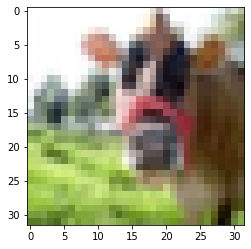

In [20]:
plt.imshow(image.permute(1, 2, 0).numpy())  # image.permute - Convert image to proper dimension PyTorch

In [22]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [23]:
test_dataset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                         shuffle=False)

Files already downloaded and verified



### The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

https://www.cs.toronto.edu/~kriz/cifar.html

In [11]:
# 10 классов
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### The CIFAR-100 dataset
This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).
Here is the list of classes in the CIFAR-100:

https://www.cs.toronto.edu/~kriz/cifar.html

In [24]:
# The 100 classes in the CIFAR-100 are grouped into 20 superclasses.
# 20 superclasses
Superclases = ('aquatic mammals', 'fish', 'flowers', 'food containers',
               'fruit and vegetables', 'household electrical devices',
               'household furniture', 'insects', 'large carnivores',
               'large man-made outdoor things', 'large natural outdoor scenes', 
               'large omnivores and herbivores', 'medium-sized mammals',
               'non-insect invertebrates', 'people', 'reptiles',
               'small mammals', 'trees', 'vehicles 1', 'vehicles 2')

# 100 classes
classes = ('beaver', 'dolphin', 'otter', 'seal', 'whale',
           'aquarium fish', 'flatfish', 'ray', 'shark', 'trout',
           'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
           'bottles', 'bowls', 'cans', 'cups', 'plates',
           'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers',
           'clock', 'computer keyboard', 'lamp', 'telephone', 'television',
           'bed', 'chair', 'couch', 'table', 'wardrobe',
           'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
           'bear', 'leopard', 'lion', 'tiger', 'wolf',
           'bridge', 'castle', 'house', 'road', 'skyscraper',
           'cloud', 'forest', 'mountain', 'plain', 'sea',
           'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
           'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
           'crab', 'lobster', 'snail', 'spider', 'worm',
           'baby', 'boy', 'girl', 'man', 'woman',
           'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
           'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
           'maple', 'oak', 'palm', 'pine', 'willow',
           'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train',
           'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor')

Суперклассы = <br>
('водные млекопитающие', 'рыба', 'цветы',<br> 'контейнеры для пищевых продуктов',
'фрукты и овощи',<br>
'бытовые электроприборы',
'бытовая мебель',<br>
'насекомые', 'большие хищники',<br>
'большие искусственные наружные предметы', 'большие естественные сцены на открытом воздухе',<br>
'крупные всеядные и травоядные', 'средние млекопитающие',<br>
'не насекомое беспозвоночные', 'люди', 'рептилии',
'мелкие млекопитающие', 'деревья',<br> 'транспортные средства 1', 'транспортные средства 2')<br><br>

Классы =
('бобер', 'Дельфин', 'выдра', 'печать', 'кит',<br>
'аквариумные рыбки', 'камбала', 'луч', 'акула', 'форель',<br>
'орхидеи', 'маки', 'розы', 'подсолнухи', 'тюльпаны',<br>
'бутылки', 'шары', 'банок', 'чашки', 'тарелки',<br>
'яблоки', 'грибочки', 'апельсины', 'груши', 'сладким перцем',<br>
'часы', 'клавиатура', 'светильник', 'телефон', 'телевизор',<br>
'постель', 'председатель', 'дивана', 'таблица', 'шкаф',<br>
'пчела', 'Жук', 'бабочка', 'гусеница', 'Тараканище',<br>
'медведь', 'леопард', 'лев', 'тигр', 'волк',<br>
'мост', 'замок', 'дом', 'дорога', 'небоскреб',<br>
'облако', 'лесной', 'горный', 'равнина', 'море',<br>
'верблюд', 'быдло', 'шимпанзе', 'слон', 'кенгуру',<br>
'лиса', 'дикобраз', 'опоссум', 'енот', 'скунс',<br>
'краб', 'лобстер', 'улитка', 'паук', 'червь',<br>
'ребенок', 'парень', 'девушка', 'мужчина', 'женщина',<br>
'крокодил', 'динозавр', 'ящерица', 'змея', 'черепаха',<br>
'хомячок', 'Мышь', 'Кролик', 'землеройка', 'белка',<br>
'клен', 'дуб', 'ладони', 'сосна', 'Ива',<br>
'велосипед', 'автобус', 'мотоцикл', 'пикап', 'поезд',<br>
'газонокосилка', 'ракета', 'трамвай', 'танк', 'трактор')

### <font color='blue'>3. Создайте собственную архитектуру!</font>

3.1 Можете использовать все, что угодно, но в ограничении на использование линейные слои (пока без сверток)

3.2 Давайте добавим ограниченный Leaky_relu, то есть output = max(0.1x, 0.5x)

Ваша задача добавить его в архитектуру сети как функцию активации

3.4 Запустить обучение (по аналогии с тем, что делали на паре)</font>

# <font color='red'>a. Вариант 1 (нейросеть из лекции 2)</font>

In [25]:
# У нас задача многоклассовой классификации [torch cross entropy loss]
# https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        '''
          D init() - делаем необходимые настройки.

          input_dim - размерность вектора входных данных
          hidden_dim - параметр для настройки скрытых слоёв
          output_dim - размерность выходного слоя, равно количеству классов (10 или 100)
        '''
      
        super().__init__()  # вызываем конструктор суперкласса

        # Создаём 4 полносвязных слоя (в Pytorch Linear, в Keras они называются Dense )
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)


    # Метод forward() - описывает, как данные передаются по сети при обучении,
    # так и при предсказании (inference - вывод)
    def forward(self, x):
        '''
        1 - Необходимо преобразовать 3-х мерный тензор (x, y + rgb)
            в одномерный тензор для передачи в первый слой Linear. 
            Делается это с помощью view() - аналог reshape().
        2 - Возвращаем выходные данные softmax,
            чтобы получить прогноз для этого изображения.
        '''

        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        # Задаём функцию потерь Leaky_relu
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc4(x)
        # x = F.softmax(x)
        return x


    def predict(self, x):
        x = self.forward(x)
        x = F.softmax(x)
        return x      



# net = Net(3072, 100, 10)   # CIFAR10
net = Net(3072, 100, 100)  # CIFAR10

In [33]:
print(net)

Net(
  (fc1): Linear(in_features=3072, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=100, bias=True)
)


Запускаем обучение

In [51]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [27]:
from tqdm import tqdm

In [28]:
for epoch in tqdm(range(10)):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

  0%|          | 0/10 [00:00<?, ?it/s]

[1,     1] loss: 0.002
[1,   301] loss: 0.691
[1,   601] loss: 0.690


 10%|█         | 1/10 [00:16<02:32, 16.97s/it]

[2,     1] loss: 0.002
[2,   301] loss: 0.689
[2,   601] loss: 0.688


 20%|██        | 2/10 [00:33<02:14, 16.86s/it]

[3,     1] loss: 0.002
[3,   301] loss: 0.685
[3,   601] loss: 0.681


 30%|███       | 3/10 [00:50<01:57, 16.78s/it]

[4,     1] loss: 0.002
[4,   301] loss: 0.664
[4,   601] loss: 0.647


 40%|████      | 4/10 [01:07<01:40, 16.70s/it]

[5,     1] loss: 0.002
[5,   301] loss: 0.628
[5,   601] loss: 0.620


 50%|█████     | 5/10 [01:23<01:23, 16.70s/it]

[6,     1] loss: 0.002
[6,   301] loss: 0.611
[6,   601] loss: 0.610


 60%|██████    | 6/10 [01:40<01:06, 16.68s/it]

[7,     1] loss: 0.002
[7,   301] loss: 0.603
[7,   601] loss: 0.602


 70%|███████   | 7/10 [01:57<00:50, 16.68s/it]

[8,     1] loss: 0.002
[8,   301] loss: 0.597
[8,   601] loss: 0.594


 80%|████████  | 8/10 [02:14<00:33, 16.77s/it]

[9,     1] loss: 0.002
[9,   301] loss: 0.592
[9,   601] loss: 0.584


 90%|█████████ | 9/10 [02:31<00:16, 16.85s/it]

[10,     1] loss: 0.002
[10,   301] loss: 0.582
[10,   601] loss: 0.577


100%|██████████| 10/10 [02:47<00:00, 16.79s/it]

Training is finished!


# <font color='red'>b. Вариант 2</font>

- Увеличиваем количество слоёв и нейронов

In [45]:
# У нас задача многоклассовой классификации [torch cross entropy loss]
# https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        '''
          D init() - делаем необходимые настройки.

          input_dim - размерность вектора входных данных
          hidden_dim - параметр для настройки скрытых слоёв
          output_dim - размерность выходного слоя, равно количеству классов (10 или 100)
        '''
      
        super().__init__()  # вызываем конструктор суперкласса

        # Создаём 4 полносвязных слоя (в Pytorch Linear, в Keras они называются Dense )
        self.fc1 = nn.Linear(input_dim, 8 * hidden_dim)
        self.fc2 = nn.Linear(8 * hidden_dim, 4 * hidden_dim)
        self.fc3 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc4 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, output_dim)


    # Метод forward() - описывает, как данные передаются по сети при обучении,
    # так и при предсказании (inference - вывод)
    def forward(self, x):
        '''
        1 - Необходимо преобразовать 3-х мерный тензор (x, y + rgb)
            в одномерный тензор для передачи в первый слой Linear. 
            Делается это с помощью view() - аналог reshape().
        2 - Возвращаем выходные данные softmax,
            чтобы получить прогноз для этого изображения.
        '''

        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        # Задаём функцию потерь Leaky_relu
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc4(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc5(x)
        # x = F.softmax(x)
        return x


    def predict(self, x):
        x = self.forward(x)
        x = F.softmax(x)
        return x      



# net = Net(3072, 100, 10)   # CIFAR10
net = Net(3072, 100, 100)  # CIFAR100
print(net)

Net(
  (fc1): Linear(in_features=3072, out_features=800, bias=True)
  (fc2): Linear(in_features=800, out_features=400, bias=True)
  (fc3): Linear(in_features=400, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=100, bias=True)
  (fc5): Linear(in_features=100, out_features=100, bias=True)
)


In [46]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [47]:
for epoch in tqdm(range(10)):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

  0%|          | 0/10 [00:00<?, ?it/s]

[1,     1] loss: 0.002
[1,   301] loss: 0.691
[1,   601] loss: 0.691


 10%|█         | 1/10 [00:28<04:18, 28.69s/it]

[2,     1] loss: 0.002
[2,   301] loss: 0.691
[2,   601] loss: 0.691


 20%|██        | 2/10 [00:57<03:48, 28.53s/it]

[3,     1] loss: 0.002
[3,   301] loss: 0.690
[3,   601] loss: 0.690


 30%|███       | 3/10 [01:26<03:21, 28.79s/it]

[4,     1] loss: 0.002
[4,   301] loss: 0.689
[4,   601] loss: 0.689


 40%|████      | 4/10 [01:54<02:51, 28.65s/it]

[5,     1] loss: 0.002
[5,   301] loss: 0.687
[5,   601] loss: 0.685


 50%|█████     | 5/10 [02:22<02:22, 28.52s/it]

[6,     1] loss: 0.002
[6,   301] loss: 0.675
[6,   601] loss: 0.661


 60%|██████    | 6/10 [02:51<01:53, 28.41s/it]

[7,     1] loss: 0.002
[7,   301] loss: 0.638
[7,   601] loss: 0.630


 70%|███████   | 7/10 [03:19<01:25, 28.36s/it]

[8,     1] loss: 0.002
[8,   301] loss: 0.620
[8,   601] loss: 0.615


 80%|████████  | 8/10 [03:47<00:56, 28.33s/it]

[9,     1] loss: 0.002
[9,   301] loss: 0.608
[9,   601] loss: 0.607


 90%|█████████ | 9/10 [04:18<00:29, 29.12s/it]

[10,     1] loss: 0.002
[10,   301] loss: 0.603
[10,   601] loss: 0.600


100%|██████████| 10/10 [04:48<00:00, 28.80s/it]

Training is finished!


# <font color='red'>с. Вариант 3</font>

- Увеличиваем количество нейронов

In [48]:
# У нас задача многоклассовой классификации [torch cross entropy loss]
# https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        '''
          D init() - делаем необходимые настройки.

          input_dim - размерность вектора входных данных
          hidden_dim - параметр для настройки скрытых слоёв
          output_dim - размерность выходного слоя, равно количеству классов (10 или 100)
        '''
      
        super().__init__()  # вызываем конструктор суперкласса

        # Создаём 4 полносвязных слоя (в Pytorch Linear, в Keras они называются Dense )
        self.fc1 = nn.Linear(input_dim, 16 * hidden_dim)
        self.fc2 = nn.Linear(16 * hidden_dim, 8 * hidden_dim)
        self.fc3 = nn.Linear(8 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)


    # Метод forward() - описывает, как данные передаются по сети при обучении,
    # так и при предсказании (inference - вывод)
    def forward(self, x):
        '''
        1 - Необходимо преобразовать 3-х мерный тензор (x, y + rgb)
            в одномерный тензор для передачи в первый слой Linear. 
            Делается это с помощью view() - аналог reshape().
        2 - Возвращаем выходные данные softmax,
            чтобы получить прогноз для этого изображения.
        '''

        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        # Задаём функцию потерь Leaky_relu
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc4(x)
        # x = F.softmax(x)
        return x


    def predict(self, x):
        x = self.forward(x)
        x = F.softmax(x)
        return x      



# net = Net(3072, 100, 10)   # CIFAR10
net = Net(3072, 100, 100)  # CIFAR10

In [49]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [50]:
for epoch in tqdm(range(10)):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

  0%|          | 0/10 [00:00<?, ?it/s]

[1,     1] loss: 0.002
[1,   301] loss: 0.691
[1,   601] loss: 0.690


 10%|█         | 1/10 [00:53<07:59, 53.23s/it]

[2,     1] loss: 0.002
[2,   301] loss: 0.688
[2,   601] loss: 0.685


 20%|██        | 2/10 [01:45<07:00, 52.58s/it]

[3,     1] loss: 0.002
[3,   301] loss: 0.677
[3,   601] loss: 0.665


 30%|███       | 3/10 [02:39<06:14, 53.48s/it]

[4,     1] loss: 0.002
[4,   301] loss: 0.636
[4,   601] loss: 0.622


 40%|████      | 4/10 [03:35<05:24, 54.16s/it]

[5,     1] loss: 0.002
[5,   301] loss: 0.615
[5,   601] loss: 0.610


 50%|█████     | 5/10 [04:28<04:29, 53.84s/it]

[6,     1] loss: 0.002
[6,   301] loss: 0.607
[6,   601] loss: 0.602


 60%|██████    | 6/10 [05:21<03:34, 53.55s/it]

[7,     1] loss: 0.002
[7,   301] loss: 0.597
[7,   601] loss: 0.592


 70%|███████   | 7/10 [06:13<02:39, 53.23s/it]

[8,     1] loss: 0.002
[8,   301] loss: 0.587
[8,   601] loss: 0.583


 80%|████████  | 8/10 [07:06<01:46, 53.11s/it]

[9,     1] loss: 0.002
[9,   301] loss: 0.575
[9,   601] loss: 0.573


 90%|█████████ | 9/10 [07:59<00:53, 53.03s/it]

[10,     1] loss: 0.002
[10,   301] loss: 0.565
[10,   601] loss: 0.564


100%|██████████| 10/10 [08:52<00:00, 53.29s/it]

Training is finished!


__Вывод__:<br>

__Модель 1__:<br>
[10,   301] loss: 0.582<br>
[10,   601] loss: 0.577<br>
100%|██████████| 10/10 [02:47<00:00, 16.79s/it]Training is finished!<br>

__Модель 2__:<br>
[10,   301] loss: 0.603<br>
[10,   601] loss: 0.600<br>
100%|██████████| 10/10 [04:48<00:00, 28.80s/it]Training is finished!<br>

__Модель 3__:<br>
[10,   301] loss: 0.565<br>
[10,   601] loss: 0.564<br>
100%|██████████| 10/10 [08:52<00:00, 53.29s/it]Training is finished!<br>

Лучший результат показала **Модель 3** в которой увеличено количество нейронов по сравнению с **моделью 1**.

Второй результат показала базовая **модель 1**.

Модель 2 показала результат хуже чем **модель 3** и **модель 1**.

Таким образом ***к улучшение модели (в нашем случае) привело увеличение нейронов в слоях нейронной сети***.

# LINIAR
<hr>
CLASS torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)

**Parameters**</br>
- **in_features** – size of each input sample
- **out_features** – size of each output sample
- **bias** – If set to False, the layer will not learn an additive bias. Default: True

**Examples**:

\>>> m = nn.Linear(20, 30)<br>
\>>> input = torch.randn(128, 20)<br>
\>>> output = m(input)<br>
\>>> print(output.size())<br>
torch.Size([128, 30])

_Почему это так_?

[128, 30] = [128, 20] * [20, 30]

Проще говоря, out = input * (матрица, определяемая nn.Linear ()) + bias
(по умолчанию добавлено смещение)

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear


In [31]:
m = nn.Linear(20, 30)
input = torch.randn(128, 20)
output = m(input)
print(output.size())

torch.Size([128, 30])


In [32]:
input, output, m

(tensor([[ 0.9445, -0.1955,  0.6603,  ..., -1.8430,  1.0766,  1.1012],
         [-0.7275,  0.0465, -0.1388,  ...,  2.5209, -1.3153,  0.2042],
         [ 0.2835, -0.1270,  0.3482,  ..., -0.2494,  0.6629,  0.0253],
         ...,
         [-0.8521, -0.3214, -1.1370,  ...,  1.5775, -0.6483,  1.2110],
         [-0.9432, -0.4864, -0.0609,  ...,  0.5493, -0.5672, -0.2799],
         [ 0.7819,  0.7470,  0.8465,  ...,  1.1702,  1.1674,  0.2896]]),
 tensor([[ 1.0652,  0.4712, -0.2064,  ...,  0.7593, -0.0618,  0.2927],
         [-0.4639, -0.8240, -0.0374,  ...,  1.4166,  1.2292,  0.8203],
         [ 0.5130, -0.1389, -0.2058,  ..., -0.1242,  0.7475,  0.5621],
         ...,
         [-1.2242, -0.6276, -0.4251,  ..., -0.0405, -0.0474, -0.6426],
         [-0.9513,  0.1726,  0.8952,  ..., -0.5510, -0.4159, -0.6513],
         [ 0.5482, -0.7059,  0.0225,  ...,  0.0109,  0.6222, -0.2377]],
        grad_fn=<AddmmBackward0>),
 Linear(in_features=20, out_features=30, bias=True))